# EDA + Model building in Depth On Heart Diseases

### Objective : 
Main obejctive behind this notebook is to give an idea along with workflow of Machine Learning Processes.

Starting from **Getting data informaion to Exploratory Data Analysis.**

I am trying to keep it as **simple** as i can so that newbie can also understand the workflow.

If you learn anything useful from this notebook then **Give Upvote :)


 ## Contents of the Notebook:

####  Exploratory Data Analysis(EDA)
1) Analysis of the features.

2) Finding any relations or trends considering multiple features.


##  Exploratory Data Analysis(EDA)

### Attribute Information:
    1. age                                                  2. sex
    3. chest pain type (4 values)                           4. resting blood pressure
    5. serum cholestoral in mg/dl                           6. fasting blood sugar > 120 mg/dl
    7. resting electrocardiographic results (values 0,1,2)  8. maximum heart rate achieved
    9. exercise induced angina                              10. oldpeak = ST depression induced by exercise relative to rest
    11. the slope of the peak exercise ST segment           12. number of major vessels (0-3) colored by flourosopy
    13. thal: 3 = normal; 6 = fixed defect; 
            7 = reversable defect                           14. target column

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color=sns.color_palette()

In [2]:
data=pd.read_csv('Heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


### How many people are suffering from Heart Disease ?

Text(0.5,1,'Heart Disease')

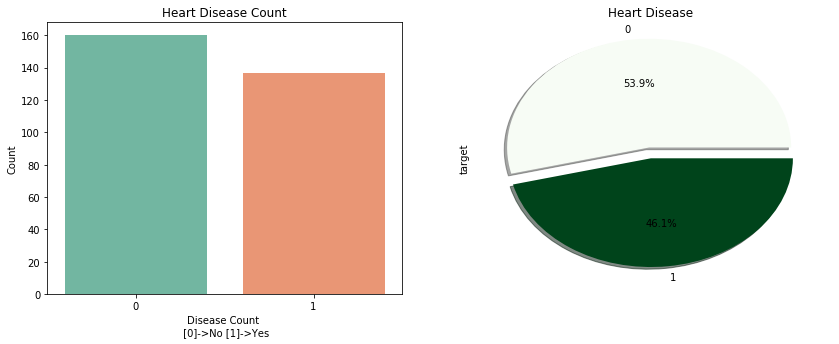

In [3]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=data, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Disease Count \n [0]->No [1]->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
data['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Greens')
plt.title("Heart Disease")

From above graph we can say that not more than half of the population suffering from Heart Disease with parcentage of 46.1%. 

Let's explore more feature to get more insight from dataset

### Feature analysis

### a)->SEX (Category)

Text(0.5,1,'0 ->Female , 1 -> Male')

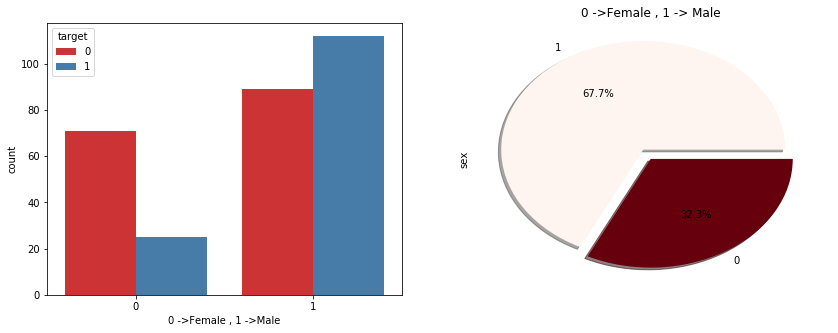

In [4]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
data.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Reds')
ax[1].set_title("0 ->Female , 1 -> Male")

Number of **Men** suffering from Heart Disease are more than **Women**.

Let's explore other feature

### b)-> fasting blood sugar (Fbs) (Category)

Text(0.5,1,'0 -> fps <120 , 1 -> fps>120')

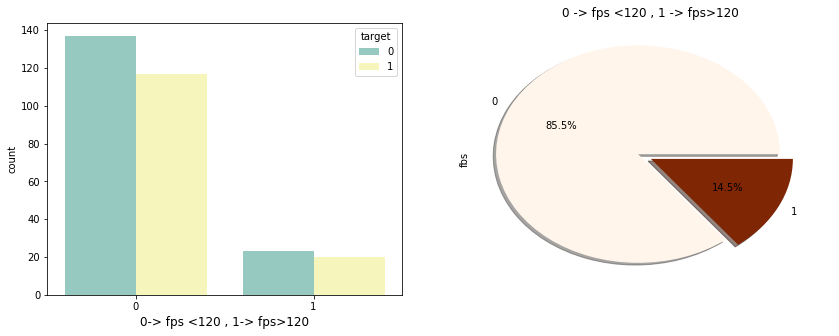

In [5]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fbs',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("0-> fps <120 , 1-> fps>120",size=12)
data.fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Oranges')
ax[1].set_title("0 -> fps <120 , 1 -> fps>120",size=12)

This is weird **People having fps < 120 have more chance of having Heart Disease than people havnig fps >120**

This insight will also be useful for our model

Let's explore more

### c) resting electrocardiographic results (values 0,1,2) (Category)

Text(0.5,1,'resting electrocardiographic')

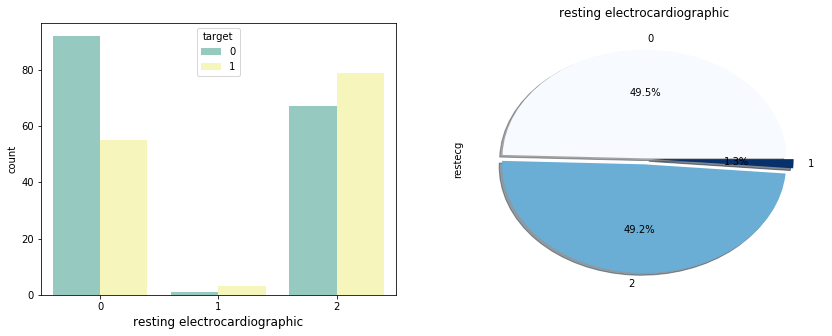

In [6]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
data.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12)

An electrocardiogram (ECG) is a test which measures the electrical activity of your heart to show whether or not it is working normally. An ECG records the heart's rhythm and activity on a moving strip of paper or a line on a screen.With above graph as a refrence we can **if resting electrocardiographic is 2 then person have more chances of suffering from Heart Disease**

### d) the slope of the peak exercise ST segment (slope)(Category)

Text(0.5,1,'peak exercise ST segment ')

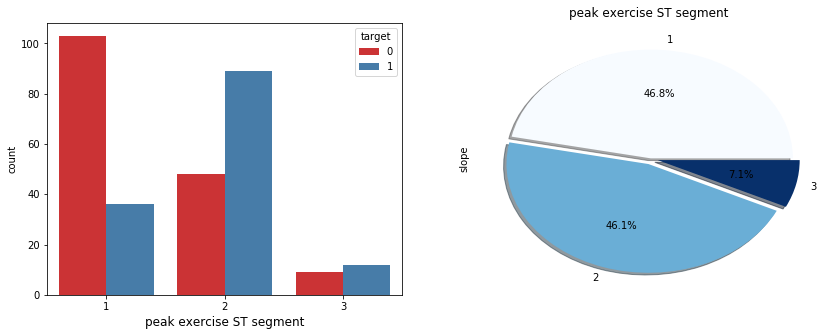

In [7]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='slope',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
data.slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12)

Feature (the peak exercise ST segment slope) has three symbolic values (flat, up sloping, downsloping)


Therefore **People having up sloping are more prone to Heart Disease than flat and downsloping**. This is useful for our model

### e)  number of major vessels colored by flourosopy (category)

Text(0.5,1,'number of major vessels colored by flourosopy')

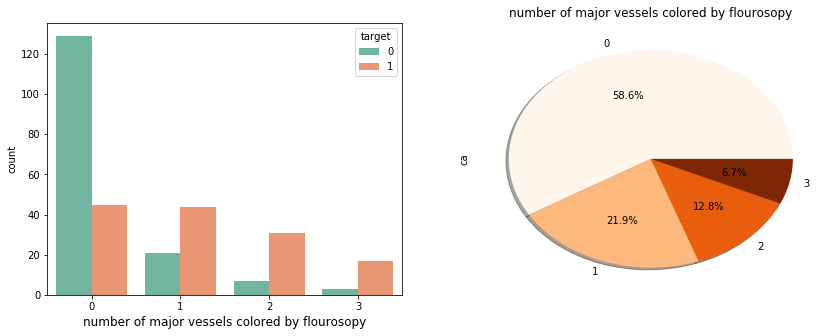

In [8]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='ca',data=data,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
data.ca.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Oranges')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

Since **Fluoroscopy** use to  produce x-ray which will makes possible to see internal organs in motion. Fluoroscopy uses x-ray to produce real-time video images.

### f) thal 3 = normal, 6 = fixed defect, 7 = reversable defect (category feature)

Text(0.5,1,'thal')

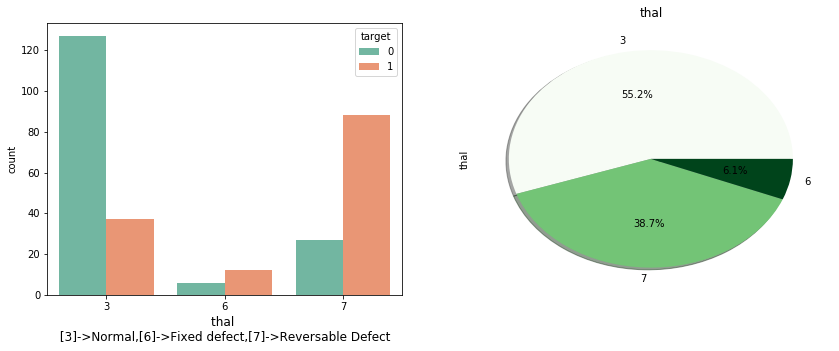

In [11]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='thal',data=data,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("thal \n [3]->Normal,[6]->Fixed defect,[7]->Reversable Defect ",size=12)
data.thal.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Greens')
ax[1].set_title("thal",size=12)

**People with reverseable defect (value: 7) have high risk.**

### g) Chest Pain (category)

Text(0.5,1,'Chest pain')

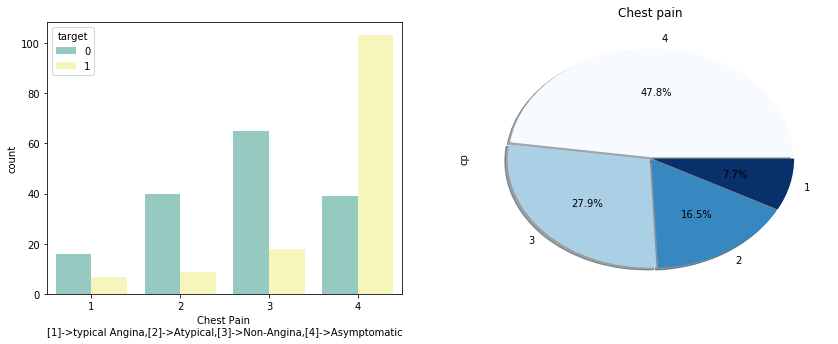

In [12]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("Chest Pain \n[1]->typical Angina,[2]->Atypical,[3]->Non-Angina,[4]->Asymptomatic")
data.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Blues')
ax[1].set_title("Chest pain")

4-Levels of chest pain given in data where 3 is highest

**People who are on 3rd level of chest pain are very less as compared to people who are on 4th level of chest pain**. 

This insight will be very usefull for our model